In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_ml = pd.read_csv('../data/raw/df_ml.csv')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321193 entries, 0 to 1321192
Data columns (total 93 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID_partida           1321193 non-null  int64  
 1   jugada_num           1321193 non-null  int64  
 2   SAN                  1321193 non-null  object 
 3   eval                 1316155 non-null  float64
 4   turno                1321193 non-null  object 
 5   Resultado            1321193 non-null  int64  
 6   White                1321193 non-null  object 
 7   Black                1321193 non-null  object 
 8   WhiteElo             1321193 non-null  int64  
 9   BlackElo             1321193 non-null  int64  
 10  ECO                  1321193 non-null  object 
 11  ECO_Family           1321193 non-null  object 
 12  TimeControl          1321193 non-null  object 
 13  Termination          1321193 non-null  object 
 14  calidad_jugada       1321193 non-null  object 
 15

In [5]:
df_ml.describe()

,ID_partida,jugada_num,eval,Resultado,WhiteElo,BlackElo,material_blancas,material_negras,diferencia_material,turno.1,...,FEN_60,FEN_61,FEN_62,FEN_63,eval_anterior,pct_buenas,desconocida,pct_dudosas,mala,pct_errores
count,1.321193e+06,1.321193e+06,1.316155e+06,1.321193e+06,1.321193e+06,1.321193e+06,1.321193e+06,1.321193e+06,1.321193e+06,1.321193e+06,...,1.321193e+06,1.321193e+06,1.321193e+06,1.321193e+06,1.299782e+06,1.321193e+06,1.321193e+06,1.321193e+06,1.321193e+06,1321193.0
mean,1.071208e+04,3.299850e+01,1.683358e-01,2.521206e-03,1.744465e+03,1.746343e+03,2.960265e+01,2.965560e+01,-5.294684e-02,4.959328e-01,...,-2.574730e+00,-1.857352e+00,-2.435628e+00,-2.007638e+00,1.822835e-01,7.230435e-01,2.001903e-02,8.864186e-02,1.682956e-01,0.0
std,6.185920e+03,2.047859e+01,2.510114e+01,9.946262e-01,2.044087e+02,2.066962e+02,9.062877e+00,9.054829e+00,4.215299e+00,4.999836e-01,...,2.875331e+00,1.872869e+00,2.654736e+00,2.128925e+00,2.456769e+01,6.078990e-02,9.175061e-03,3.842932e-02,6.165924e-02,0.0
min,0.000000e+00,1.000000e+00,-1.235200e+02,-1.000000e+00,9.970000e+02,9.900000e+02,0.000000e+00,0.000000e+00,-3.500000e+01,0.000000e+00,...,-6.000000e+00,-6.000000e+00,-6.000000e+00,-6.000000e+00,-1.235200e+02,5.000000e-01,7.352941e-03,0.000000e+00,0.000000e+00,0.0
25%,5.354000e+03,1.600000e+01,-1.360000e+00,-1.000000e+00,1.600000e+03,1.599000e+03,2.400000e+01,2.400000e+01,-1.000000e+00,0.000000e+00,...,-6.000000e+00,-4.000000e+00,-6.000000e+00,-4.000000e+00,-1.320000e+00,6.829268e-01,1.351351e-02,6.122449e-02,1.250000e-01,0.0
50%,1.071200e+04,3.100000e+01,1.400000e-01,0.000000e+00,1.735000e+03,1.737000e+03,3.200000e+01,3.200000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,-3.000000e+00,-2.000000e+00,0.000000e+00,1.400000e-01,7.230769e-01,1.639344e-02,8.620690e-02,1.666667e-01,0.0
75%,1.607300e+04,4.800000e+01,1.430000e+00,1.000000e+00,1.879000e+03,1.883000e+03,3.800000e+01,3.800000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+00,7.636364e-01,2.380952e-02,1.132075e-01,2.098765e-01,0.0
max,2.141000e+04,1.630000e+02,1.235100e+02,1.000000e+00,2.563000e+03,2.505000e+03,4.700000e+01,4.700000e+01,3.800000e+01,1.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.235100e+02,9.620253e-01,1.428571e-01,2.777778e-01,4.189189e-01,0.0


<Figure size 1400x1200 with 0 Axes>

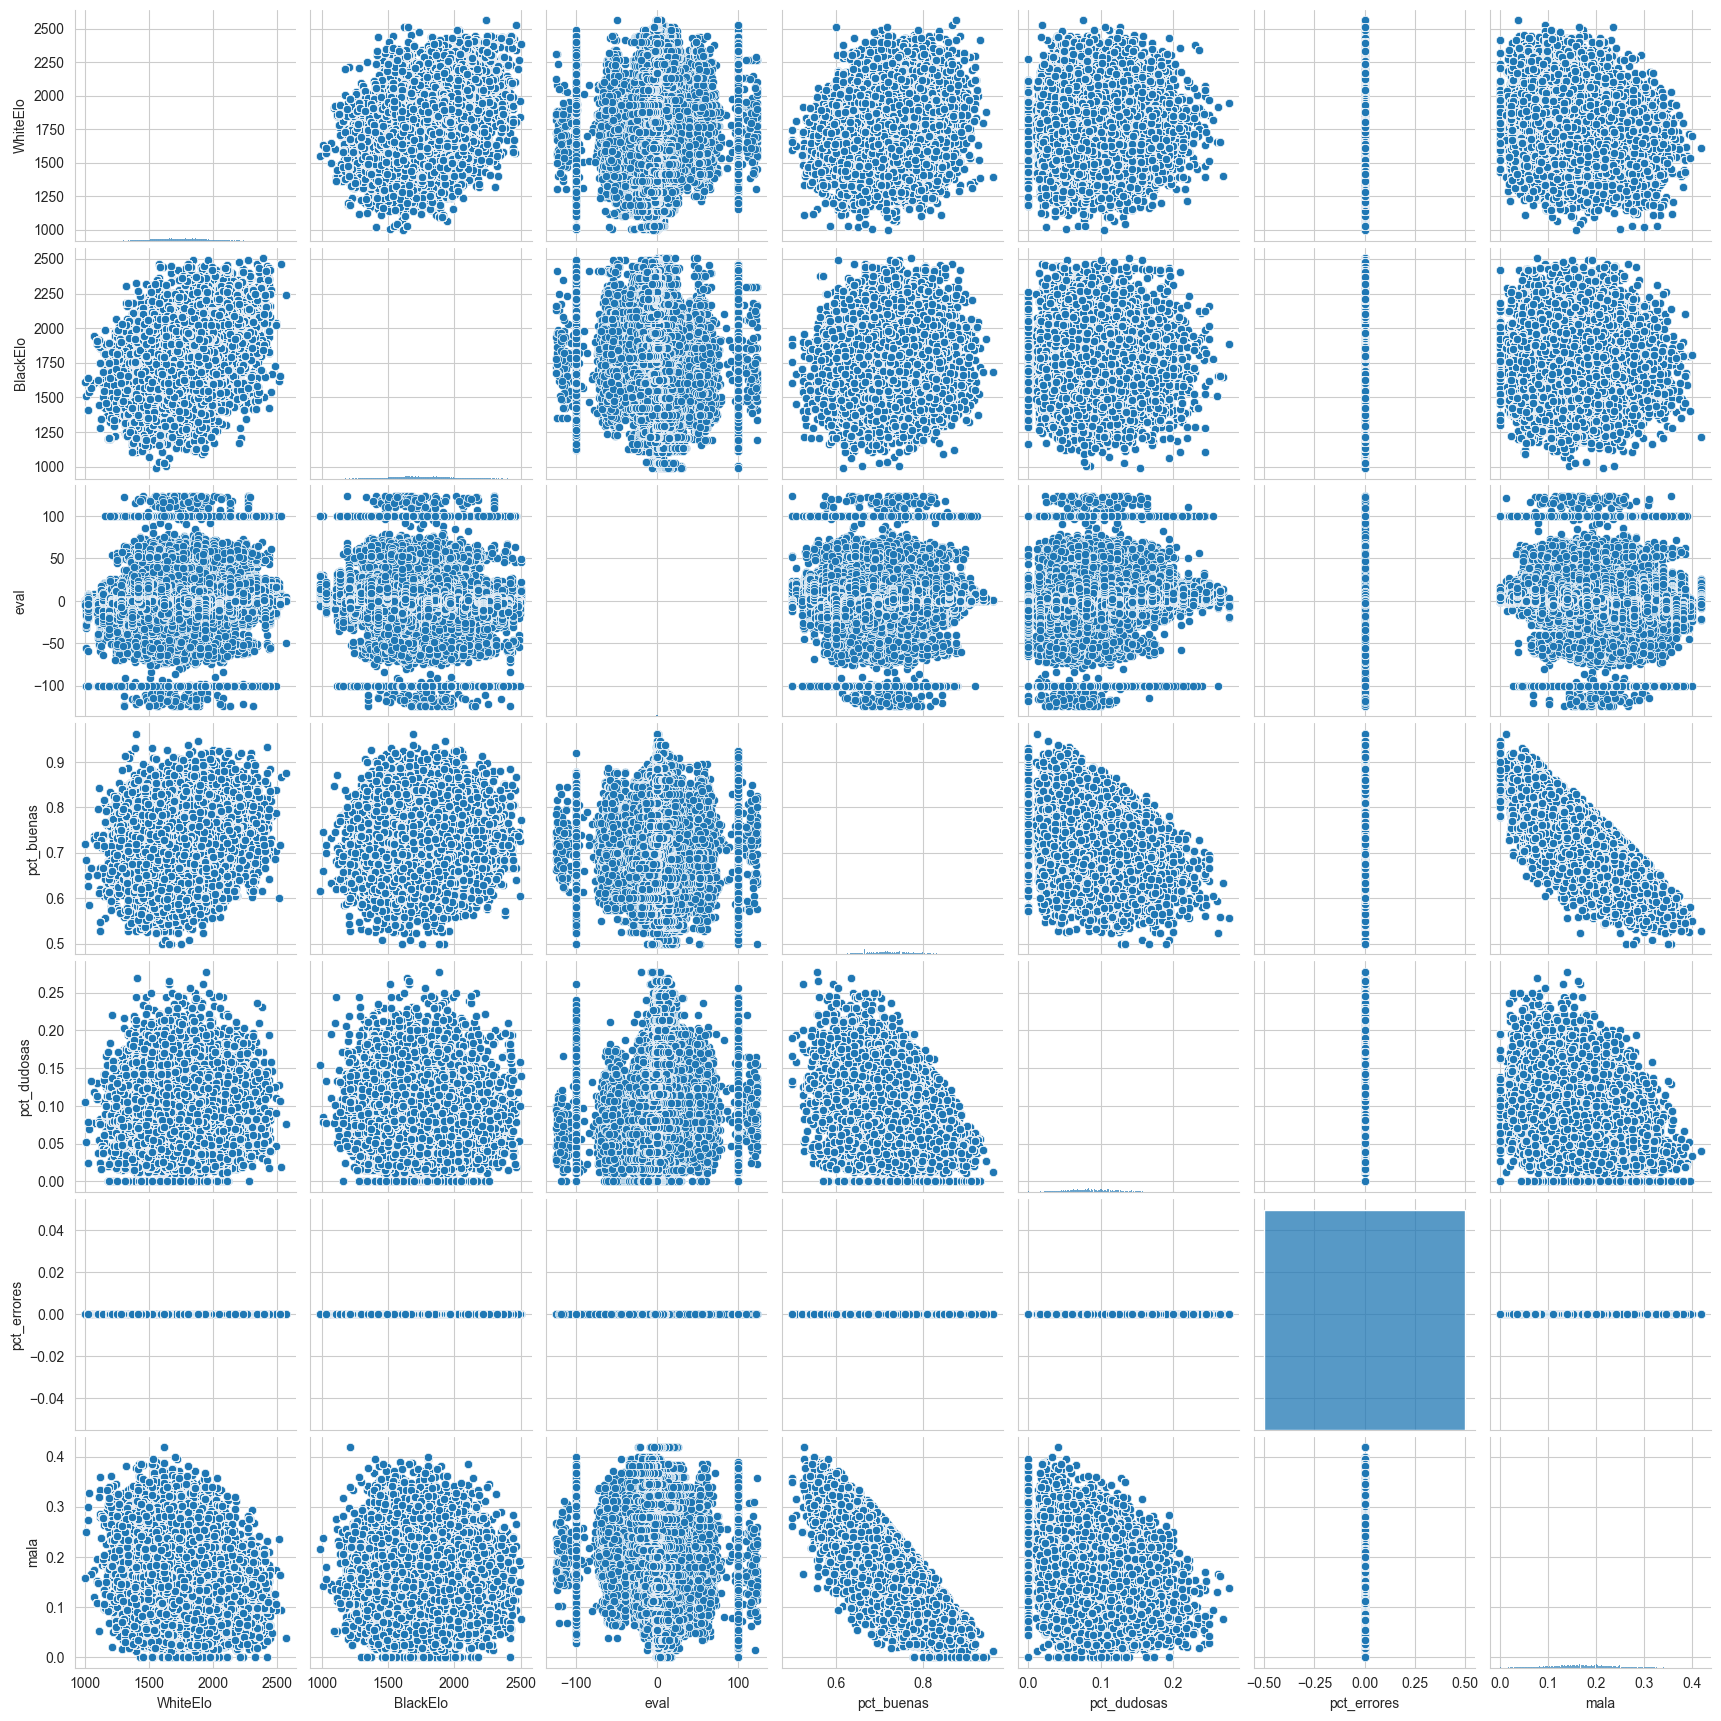

In [6]:
plt.figure(figsize=(14, 12))
sns.set_style('whitegrid')

# 2. Columnas que se utilizan
vars_interes = ['WhiteElo', 'BlackElo', 'eval', 'pct_buenas', 'pct_dudosas', 'pct_errores', 'mala']

sns.pairplot(df_ml[vars_interes])
plt.show()

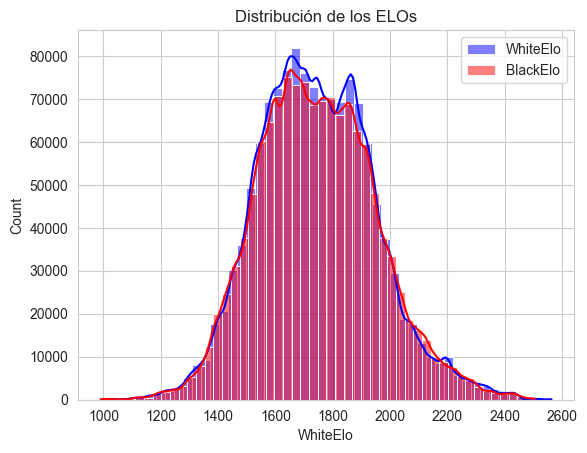

In [6]:
# 4. Distribución del objetivo ELO
sns.histplot(df_ml['WhiteElo'], bins=50, kde=True, color='blue', label='WhiteElo')
sns.histplot(df_ml['BlackElo'], bins=50, kde=True, color='red', label='BlackElo')
plt.legend()
plt.title('Distribución de los ELOs')
plt.show()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_1680\1221240277.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas, y=resultado_counts.values, palette=['black', 'gray', 'yellow'])


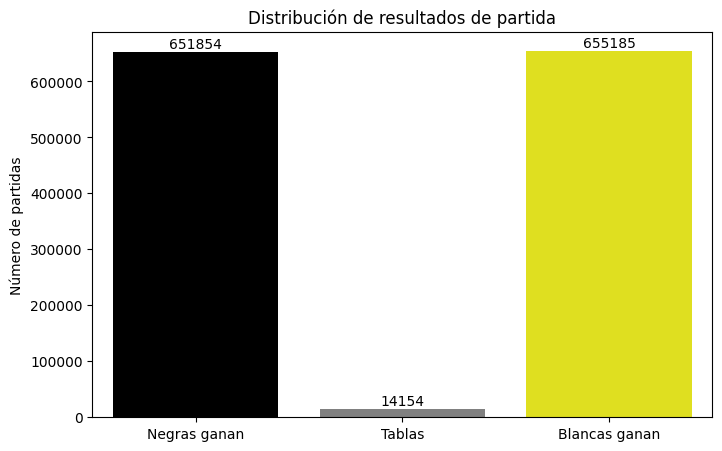

In [11]:

resultado_counts = df_ml['Resultado'].value_counts().sort_index()

etiquetas = ['Negras ganan', 'Tablas', 'Blancas ganan']

plt.figure(figsize=(8,5))
sns.barplot(x=etiquetas, y=resultado_counts.values, palette=['black', 'gray', 'yellow'])

plt.title('Distribución de resultados de partida')
plt.ylabel('Número de partidas')

for i, valor in enumerate(resultado_counts.values):
    plt.text(i, valor + max(resultado_counts.values)*0.01, str(valor), ha='center')

plt.show()


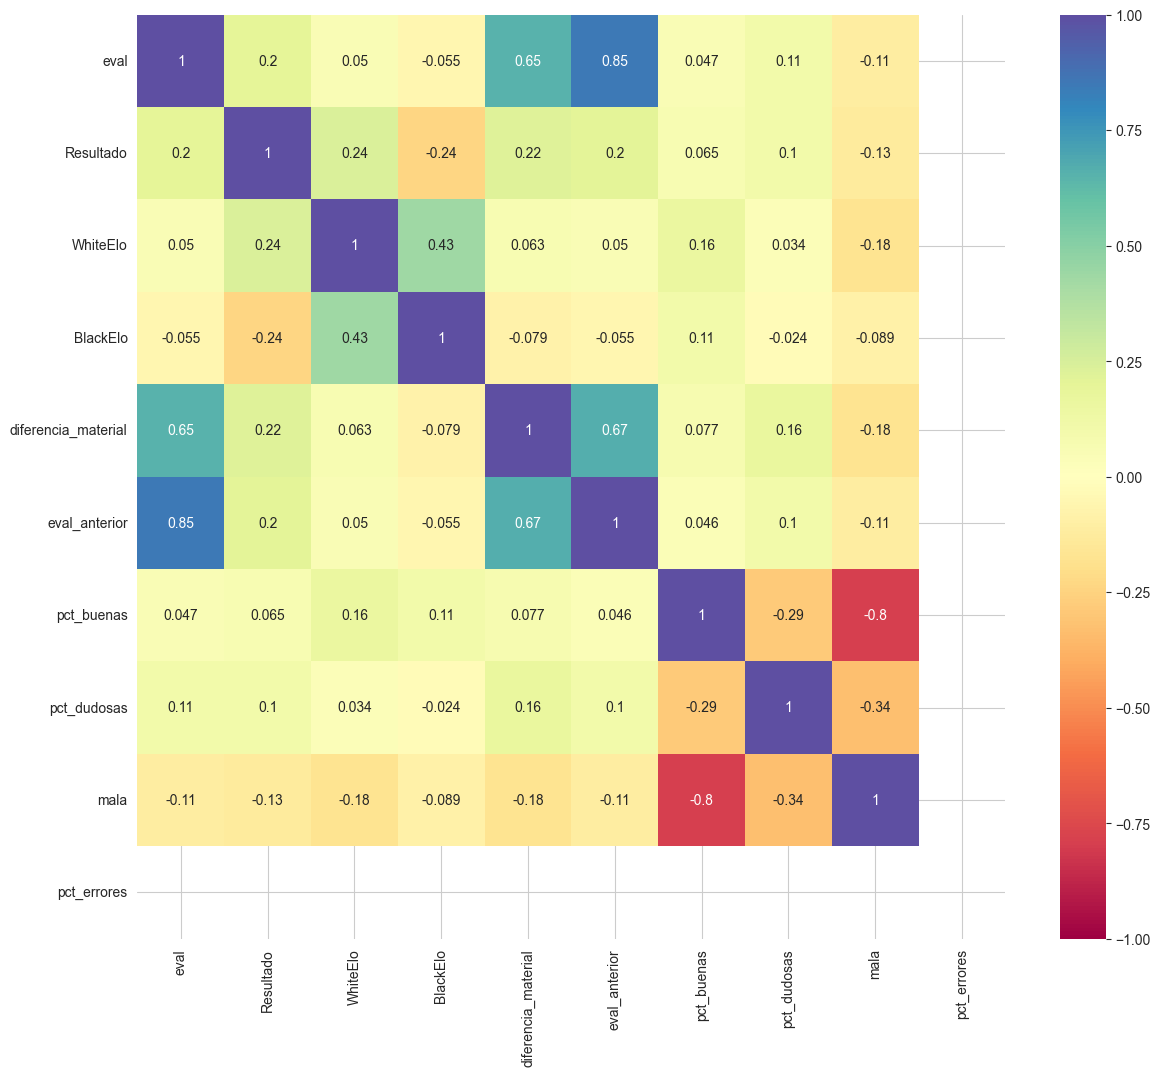

In [14]:
# Las columnas FEN (posiciones tablero en vector) las excluimos porque no son representativas
cols_numericas = [col for col in df_ml.select_dtypes(include=['int64', 'float64']).columns 
                  if not col.startswith(
                      ('FEN_','mate','jaque','ID_partida','turno.1','enroque_', 'jugada_num', 'desc'))]

corr_sin_fen = df_ml[cols_numericas].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_sin_fen, annot=True, cmap='Spectral', center=0, vmin=-1)
plt.show()


Debido a que las correlaciones son bastante bajas los modelos complejos como Random Forest o XGBoost deberían ser más útiles que modelos lineales, ya que estos modelos más avanzados pueden capturar relaciones no lineales entre las features.
Incluso redes neuronales podrían ser más efectivos, ya que pueden identificar interacciones que no son evidentes en un análisis de correlación simple. Pero este será un proyecto más avanzado para más adelante.

Ingeniería de Variables:

Descartamos las columnas FEN_* para los modelos iniciales.

Se eliminan nulos en eval, eval_anterior con un valor 0 que es neutro, en eval anterior es lo normal porque 
en la primera jugada de cada jugador no existe jugada anterior sobre la que  calcular.

Se ajusta las columnas categóricas como dummies: ECO_Family, TimeControl, para integrarlas en el modelo predictivo (WIP)

Variables que usamos actualmente para el cálculo:

% de jugadas buenas/malas/dudosas (pct_buenas, mala, pct_dudosas)

Diferencia de material

Evaluación de la jugada (eval)

Resultado de la partida (Resultado)

ELO del rival (WhiteElo-BlackElo)

Control de tiempo (TimeControl) con dummies